In [4]:
import pandas as pd

housing_df = pd.read_excel('Data/Dataset 1.xlsx')
print(housing_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         565         259         3.8462              342200        NEAR BAY  
3         413         193         4.0368              269700        NEAR BAY  
4        1094         514         3.6591              299200        NEAR BAY  


In [9]:
# Group by the categorical variable 'ocean_proximity' and calculate min, max, and mean for continuous variables
grouped_stats = housing_df.groupby('ocean_proximity').agg(['min', 'max', 'mean'])

# Display the grouped statistics with better formatting
grouped_stats.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', '#333'), ('border', '1px solid #ddd')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid #ddd')]}]
).set_properties(**{'text-align': 'center'}).set_caption("Grouped Statistics by Ocean Proximity")

In [2]:
%pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.6 MB/s eta 0:00:00a 0:00:01
DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


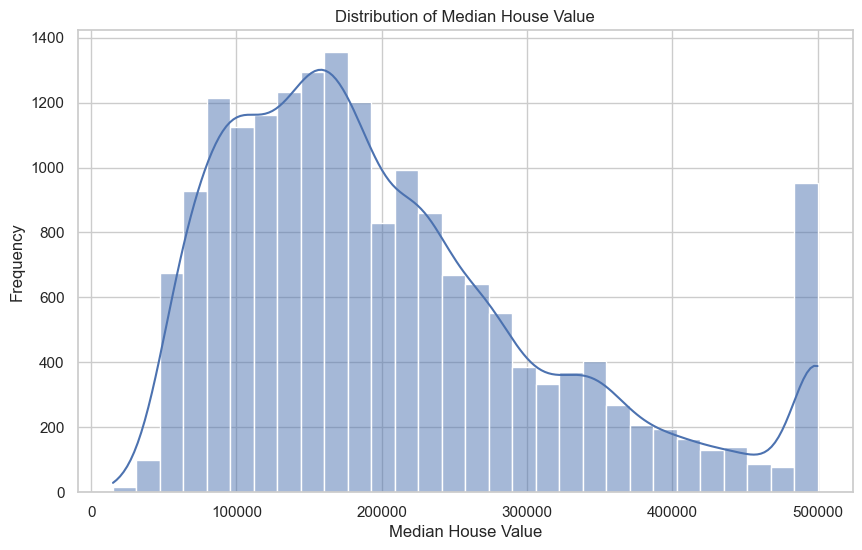

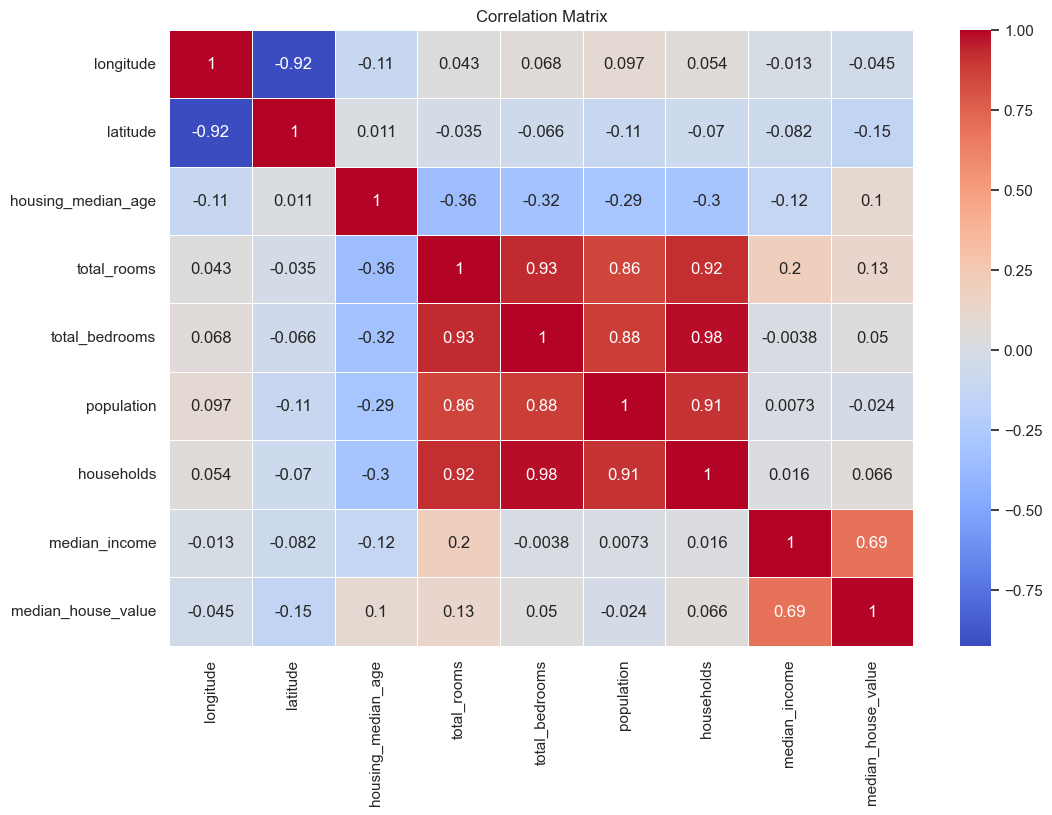

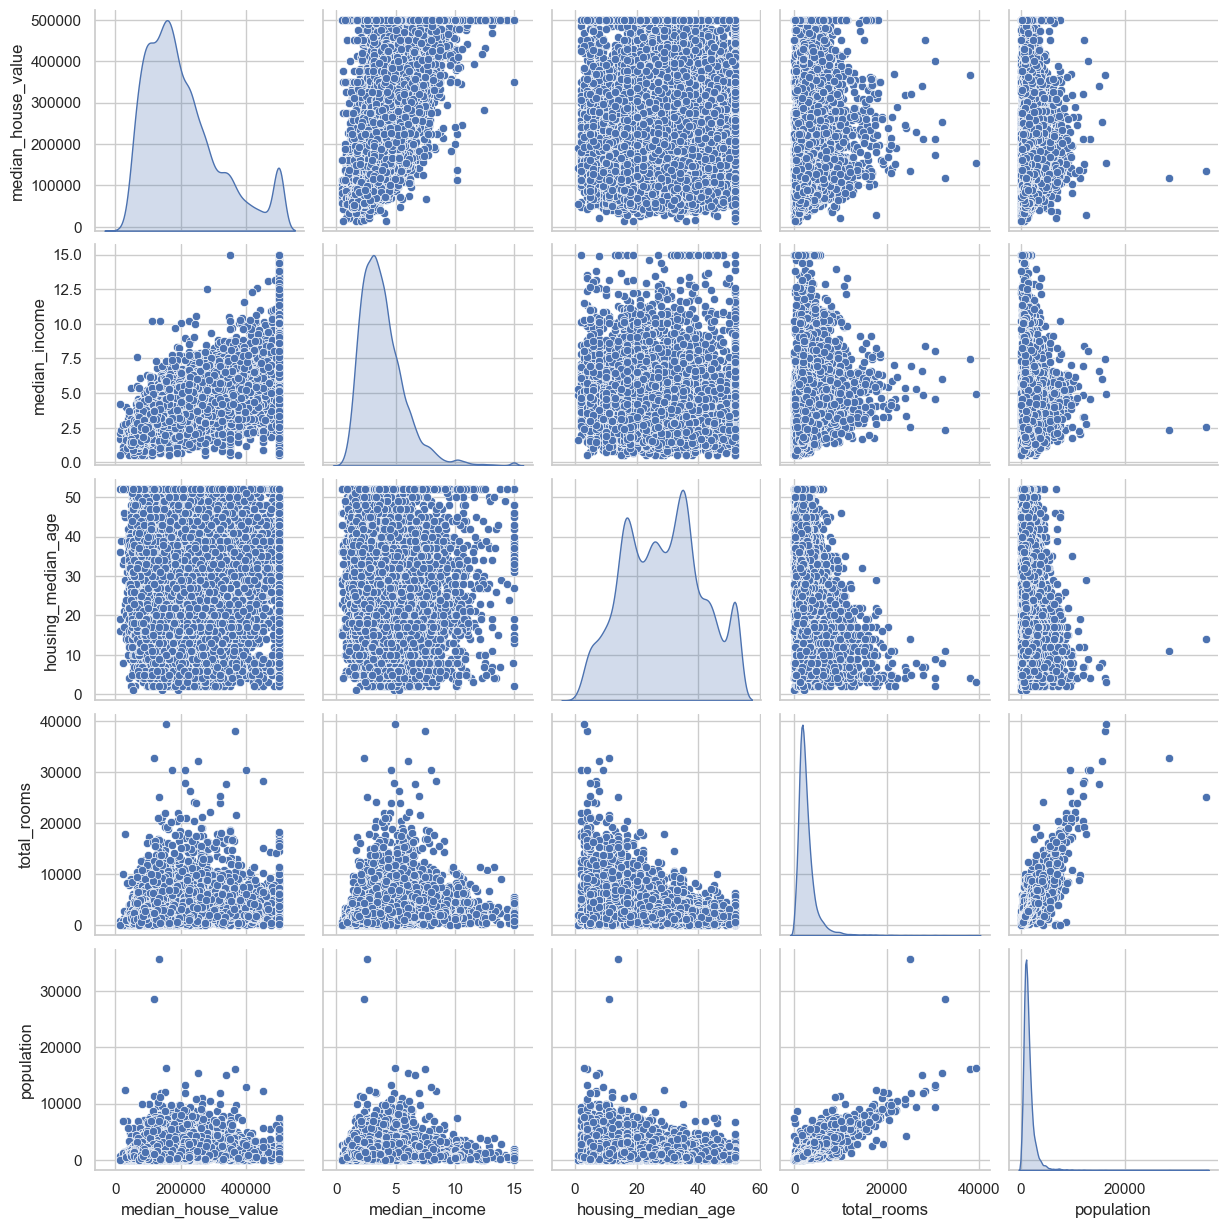

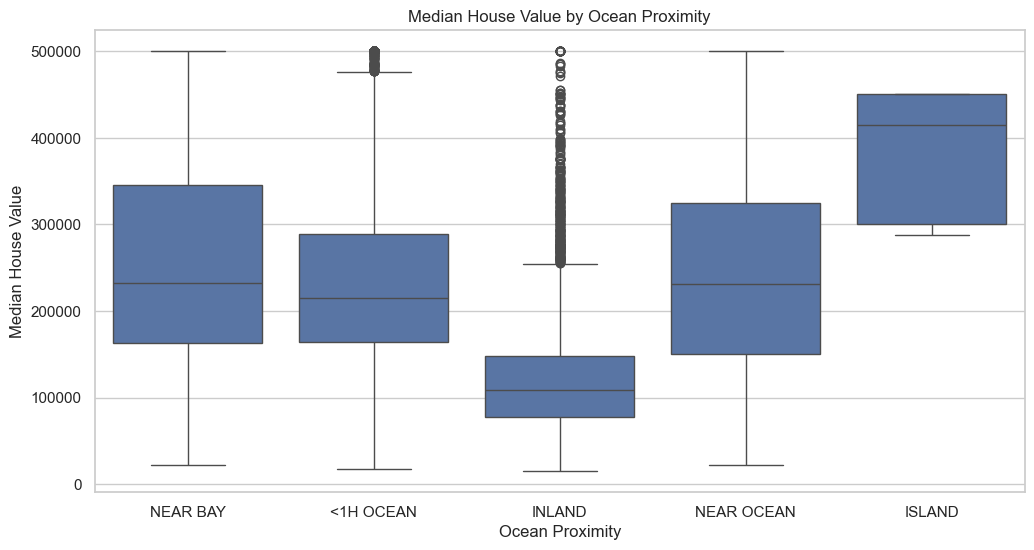

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Display the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['median_house_value'], kde=True, bins=30)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = housing_df.drop('ocean_proximity', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pairplot of a few selected variables
selected_columns = ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'population']
sns.pairplot(housing_df[selected_columns], diag_kind='kde')
plt.show()

# Boxplot of median_house_value against ocean_proximity
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing_df)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

In [11]:
%pip install folium

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import folium
from folium.plugins import MarkerCluster

# Aggregate the continuous data by the pairs of latitude and longitude
aggregated_data = housing_df.groupby(['latitude', 'longitude']).agg(['min', 'max', 'mean', 'median']).reset_index()

# Create a map centered around the mean latitude and longitude
map_center = [housing_df['latitude'].mean(), housing_df['longitude'].mean()]
map_ = folium.Map(location=map_center, zoom_start=10)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(map_)

# Add markers to the map for each pair of latitude and longitude
for _, row in aggregated_data.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    popup_text = f"""
    <b>Latitude:</b> {lat}<br>
    <b>Longitude:</b> {lon}<br>
    <b>Median House Value:</b><br>
    Min: {row[('median_house_value', 'min')]}<br>
    Max: {row[('median_house_value', 'max')]}<br>
    Mean: {row[('median_house_value', 'mean')]}<br>
    Median: {row[('median_house_value', 'median')]}<br>
    <b>Median Income:</b><br>
    Min: {row[('median_income', 'min')]}<br>
    Max: {row[('median_income', 'max')]}<br>
    Mean: {row[('median_income', 'mean')]}<br>
    Median: {row[('median_income', 'median')]}<br>
    <b>Housing Median Age:</b><br>
    Min: {row[('housing_median_age', 'min')]}<br>
    Max: {row[('housing_median_age', 'max')]}<br>
    Mean: {row[('housing_median_age', 'mean')]}<br>
    Median: {row[('housing_median_age', 'median')]}<br>
    <b>Total Rooms:</b><br>
    Min: {row[('total_rooms', 'min')]}<br>
    Max: {row[('total_rooms', 'max')]}<br>
    Mean: {row[('total_rooms', 'mean')]}<br>
    Median: {row[('total_rooms', 'median')]}<br>
    <b>Population:</b><br>
    Min: {row[('population', 'min')]}<br>
    Max: {row[('population', 'max')]}<br>
    Mean: {row[('population', 'mean')]}<br>
    Median: {row[('population', 'median')]}<br>
    """
    folium.Marker(location=[lat, lon], popup=popup_text).add_to(marker_cluster)

# Display the map
display(map_)